This code involves:

- **Perform a detailed exploratory data analysis (EDA) on both datasets:-**

This includes checking for missing values, outliers, and understanding the distribution of the data.
Apply appropriate data preprocessing techniques based on your EDA findings.

- **Polynomial Regression - Basic Implementation:-**

Implement polynomial regression models of degrees 3 and 4 for both datasets without any regularization.
Evaluate the performance of these models on your training and test datasets using appropriate metrics (e.g., RMSE, R² score).

- **Identifying Overfitting:-**

Analyze the results to show evidence of overfitting in your models. This can include examining the difference in performance metrics between training and test sets, and plotting the regression curves.

- **Advanced Regularization Techniques:-**
Implement advanced regularization techniques (Lasso, Ridge, Elastic Net) to reduce overfitting. Experiment with different regularization strengths.
Compare the performance of these regularized models with your initial models and analyze the impact of regularization.

- **Model Optimization and Hyperparameter Tuning:-**

Utilize techniques like Grid Search or Random Search to find the optimal hyperparameters for your regularized models.
Evaluate the performance of the optimized models and compare them with the previous models.

- **Handling Heteroscedasticity:-**

Implement a strategy to handle heteroscedasticity in the Heteroscedastic dataset. This could involve transforming the target variable or using models that inherently account for non-constant variance.

- **Error Analysis:-**

Perform a detailed error analysis. Investigate where and why your models are making errors, and whether these errors follow any patterns.

- **Model Interpretation:-**

Provide an interpretation of your model coefficients and discuss the implications in the context of the datasets.
Report and Presentation:

- **Document all your findings, methodologies, and analyses in a detailed report. Include visualizations to support your findings.**

- **Prepare a presentation summarizing the key aspects of your work.**



In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from datetime import datetime
from sklearn.linear_model import Ridge, Lasso, ElasticNet

**Deliverables:**

Jupyter Notebook containing the implemented code along with comments explaining each step.


A detailed report documenting your methodology, findings, and analyses.



**Evaluation Criteria:**

Correctness and efficiency of the implemented models.

Ability to identify and address overfitting.

Quality of the EDA, preprocessing, and error analysis.

Effectiveness of regularization and hyperparameter tuning.

Clarity and thoroughness of the final report and presentation.


## 0. Loading and Exploring Data

## a. Heteroscedastic

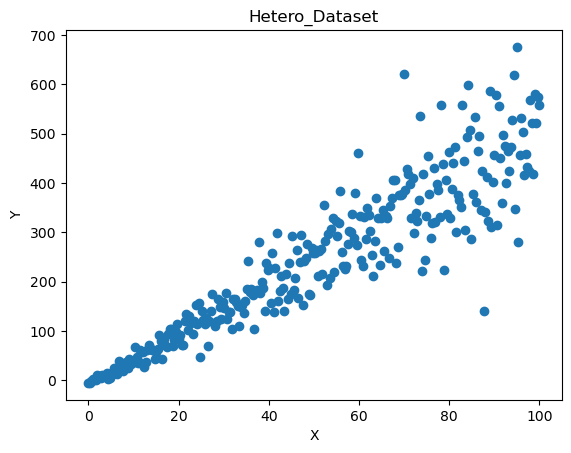

In [410]:
hetero=pd.read_csv(r'D:\Other\1- Masters Data\1- ML Course\Assignments\Assignment 3\heteroscedastic.csv')
plt.scatter(hetero['x'],hetero['y'])
plt.title("Hetero_Dataset")
plt.xlabel("X")
plt.ylabel("Y")
filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 3/screenshots/1- Hetero_Dataset.png"
plt.savefig(filename)
plt.show()

## b. Monotonic

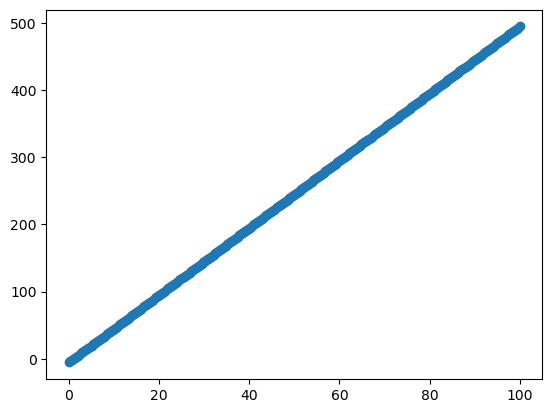

In [411]:
monotonic=pd.read_csv(r'D:\Other\1- Masters Data\1- ML Course\Assignments\Assignment 3\monotonic.csv')
plt.scatter(monotonic['x'],monotonic['y'])
filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 3/screenshots/3- Monotonic_Dataset.png"
plt.savefig(filename)
plt.show()

## 1. Exploratory Data Analysis

                          Performing EDA for Heteroscedastic dataset 
                
Data samples :- 
          x         y
0  0.000000 -5.006572
1  0.334448 -4.650530
2  0.668896 -0.926905
3  1.003344  3.590906
4  1.337793 -0.092592

Data Types :- 
x    float64
y    float64
dtype: object

Data Statistics before handling missing values::- 
                x           y
count  300.000000  300.000000
mean    50.000000  245.430221
std     29.012294  158.837887
min      0.000000   -5.006572
25%     25.000000  117.194547
50%     50.000000  238.404158
75%     75.000000  357.031076
max    100.000000  675.784956

Sum of nulls in input data 'x': 0
Sum of nulls in target data 'y': 0

Correlation: 
          x         y
x  1.000000  0.923942
y  0.923942  1.000000



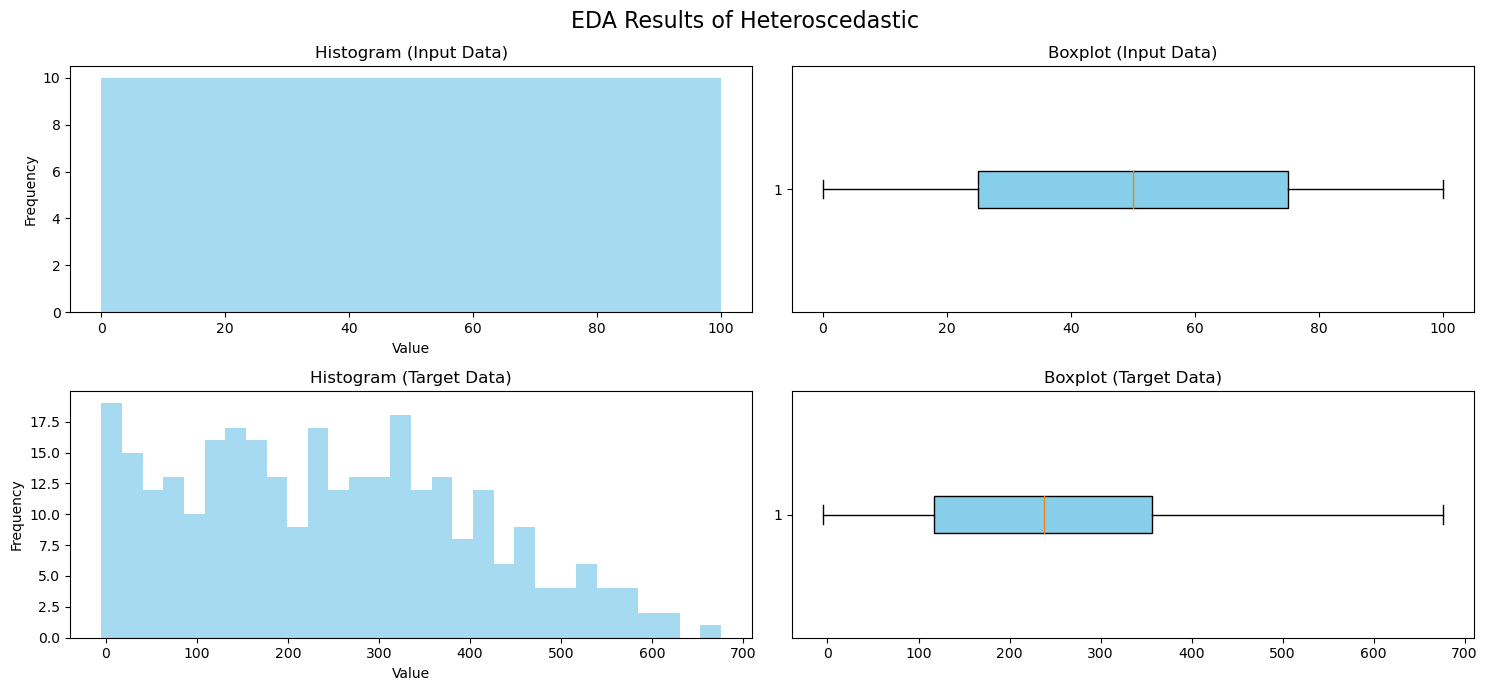

                          Performing EDA for Monotonic (Homoscedastic) dataset 
                
Data samples :- 
          x         y
0  0.000000 -5.503286
1  0.334448 -3.831045
2  0.668896 -2.158804
3  1.003344 -0.486563
4  1.337793  1.185677

Data Types :- 
x    float64
y    float64
dtype: object

Data Statistics before handling missing values::- 
                x           y
count  300.000000  300.000000
mean    50.000000  244.496714
std     29.012294  145.061468
min      0.000000   -5.503286
25%     25.000000  119.496714
50%     50.000000  244.496714
75%     75.000000  369.496714
max    100.000000  494.496714

Sum of nulls in input data 'x': 0
Sum of nulls in target data 'y': 0

Correlation: 
     x    y
x  1.0  1.0
y  1.0  1.0



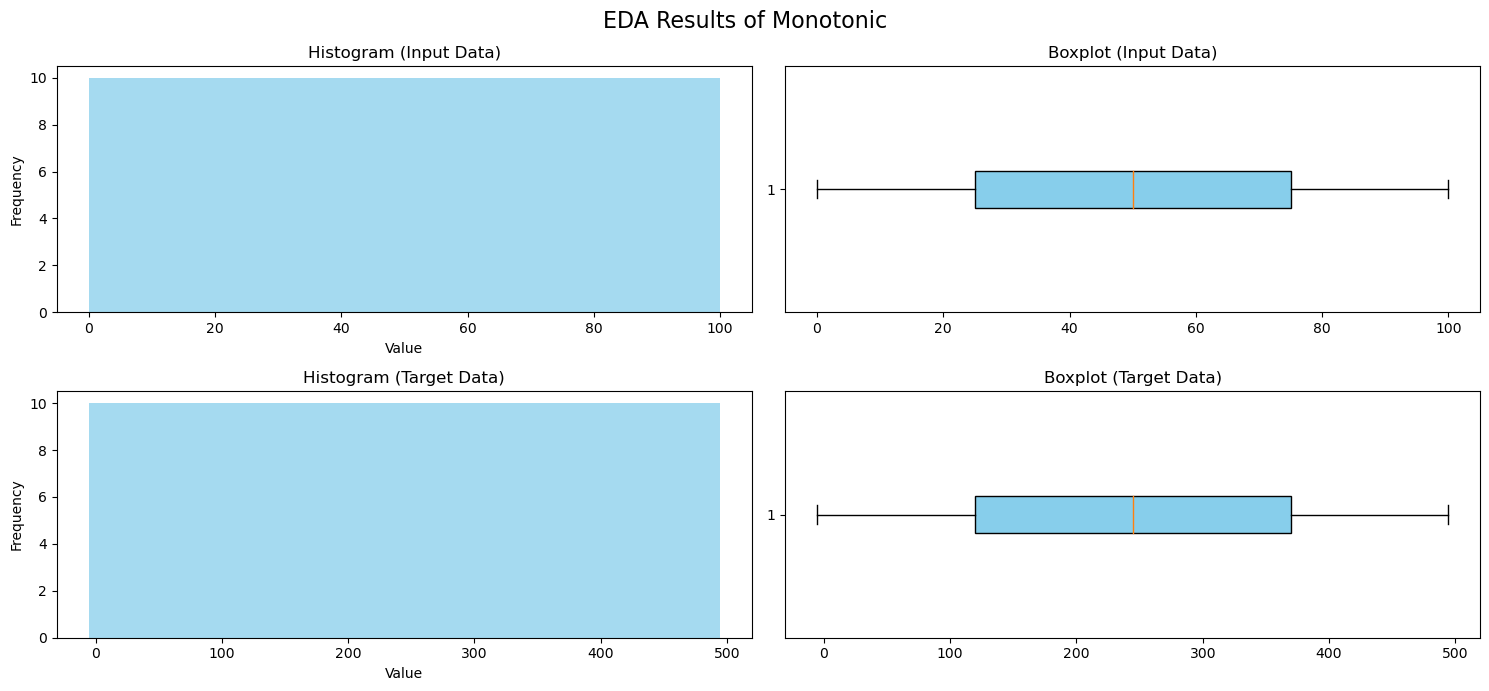

In [412]:
def EDA_Dataset(data, analysis_name):
    """
    Perform Exploratory Data Analysis on the given dataset.
    Generates summary statistics, checks for missing values, and visualizes data distributions and outliers.
    
    Parameters:
        data (pd.DataFrame): The input dataset containing 'x' and 'y' columns.
        analysis_name (String) : name of the saved pics
     """
    # Validate dataset
    if 'x' not in data.columns or 'y' not in data.columns:
        print("Error: Dataset must contain 'x' and 'y' columns.")
        return None
    
    # Checking the head of data
    print(f"Data samples :- \n{data.head()}\n")
    
    # Checking the types of data in each column
    print(f"Data Types :- \n{data.dtypes}\n")
    
    # Checking statistics of data (mean, max, min, std,....)
    print(f"Data Statistics before handling missing values::- \n{data.describe()}\n")
    
    # Checking for missing values
    print(f"Sum of nulls in input data 'x': {data['x'].isna().sum()}")
    print(f"Sum of nulls in target data 'y': {data['y'].isna().sum()}\n")
    
    # checking the correlation
    print(f"Correlation: \n{data.corr()}\n")
    # Visualization
    fig, ax = plt.subplots(2, 2, figsize=(15, 7))
    fig.suptitle(analysis_name, fontsize=16)

    # Input Data Visualization
    ax[0, 0].set_title("Histogram (Input Data)")
    ax[0, 0].hist(data['x'], bins=30, alpha=0.75, color='skyblue')
    ax[0, 0].set_xlabel('Value')
    ax[0, 0].set_ylabel('Frequency')

    ax[0, 1].set_title("Boxplot (Input Data)")
    ax[0, 1].boxplot(data['x'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

    # Target Data Visualization
    ax[1, 0].set_title("Histogram (Target Data)")
    ax[1, 0].hist(data['y'], bins=30, alpha=0.75, color='skyblue')
    ax[1, 0].set_xlabel('Value')
    ax[1, 0].set_ylabel('Frequency')

    ax[1, 1].set_title("Boxplot (Target Data)")
    ax[1, 1].boxplot(data['y'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Save and display the plot
    filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 3/screenshots/{analysis_name}.png"
    plt.savefig(filename)
    plt.show()
    
            ### Performing EDA for Heteroscedastic dataset
print("                          \033[1mPerforming EDA for Heteroscedastic dataset \n\033[0m                ")
EDA_Dataset(hetero, "EDA Results of Heteroscedastic")

            ### Performing EDA for Monotonic dataset
print("                          \033[1mPerforming EDA for Monotonic (Homoscedastic) dataset \n\033[0m                ") 
EDA_Dataset(monotonic, "EDA Results of Monotonic")

## 2. Data Preprocessing

In [413]:
def preprocess_data(data):
    """
    Preprocess the dataset by handling missing values and outliers.
    
    Parameters:
        data (pd.DataFrame): The input dataset containing 'x' and 'y' columns.
    
    Returns:
        data_cleaned (pd.DataFrame): The cleaned dataset without missing values and with outliers handled.
    """
    # Check if required columns are present
    required_columns = {'x', 'y'}
    if not required_columns.issubset(data.columns):
        raise ValueError(f"The dataset must contain the columns: {required_columns}")
    
    # Handle missing values by dropping rows with NaNs
    if data.isna().sum().sum() > 0: # totals the nulls across the entire DataFrame.
        print("Missing values detected. Dropping rows with missing values.")
        data_cleaned = data.dropna()
    else:
        data_cleaned = data.copy()

    # Detecting and Removing Outliers for 'x'
    Q1_x, Q3_x = data_cleaned['x'].quantile(0.25), data_cleaned['x'].quantile(0.75)
    IQR_x = Q3_x - Q1_x
    lower_bound_x, upper_bound_x = Q1_x - 1.5 * IQR_x, Q3_x + 1.5 * IQR_x

    # Detecting and Removing Outliers for 'y'
    Q1_y, Q3_y = data_cleaned['y'].quantile(0.25), data_cleaned['y'].quantile(0.75)
    IQR_y = Q3_y - Q1_y
    lower_bound_y, upper_bound_y = Q1_y - 1.5 * IQR_y, Q3_y + 1.5 * IQR_y

    # Filter rows within the bounds
    data_cleaned = data_cleaned[
        (data_cleaned['x'] >= lower_bound_x) & (data_cleaned['x'] <= upper_bound_x) &
        (data_cleaned['y'] >= lower_bound_y) & (data_cleaned['y'] <= upper_bound_y)
    ]
    
    # Print statistics after cleaning
    print(f"Data statistics after removing missing values and outliers:-\n{data_cleaned.describe()}\n")
    
    return data_cleaned

# Now preprocess the data after EDA
print(f"Data statistics after removing missing values and outliers for Hetero\n")
cleaned_hetero = preprocess_data(hetero)

print(f"Data statistics after removing missing values and outliers for Mono\n")
cleaned_monotonic = preprocess_data(monotonic)

Data statistics after removing missing values and outliers for Hetero

Data statistics after removing missing values and outliers:-
                x           y
count  300.000000  300.000000
mean    50.000000  245.430221
std     29.012294  158.837887
min      0.000000   -5.006572
25%     25.000000  117.194547
50%     50.000000  238.404158
75%     75.000000  357.031076
max    100.000000  675.784956

Data statistics after removing missing values and outliers for Mono

Data statistics after removing missing values and outliers:-
                x           y
count  300.000000  300.000000
mean    50.000000  244.496714
std     29.012294  145.061468
min      0.000000   -5.503286
25%     25.000000  119.496714
50%     50.000000  244.496714
75%     75.000000  369.496714
max    100.000000  494.496714



## 3. Splitting the data to train and test

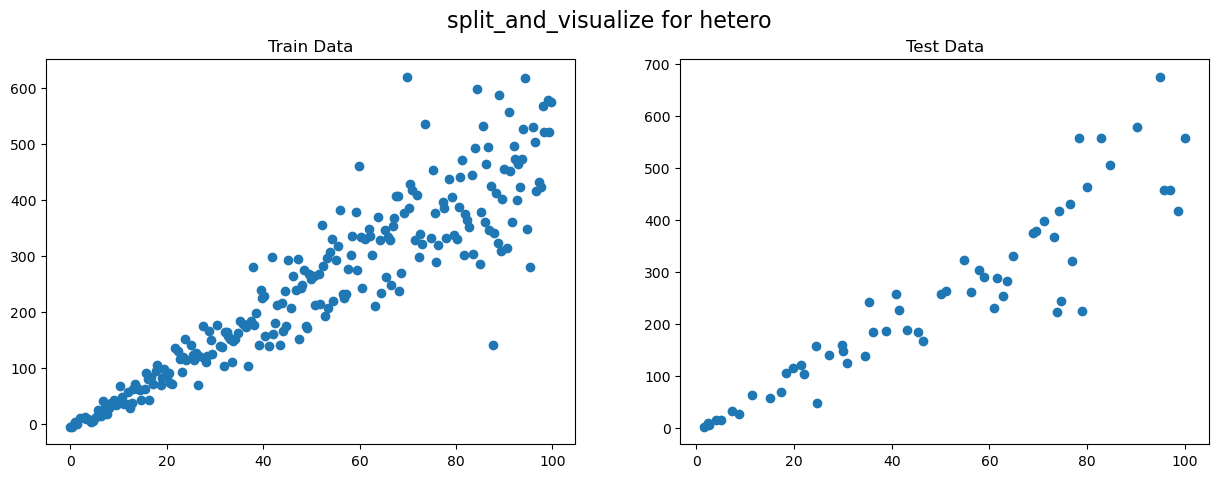

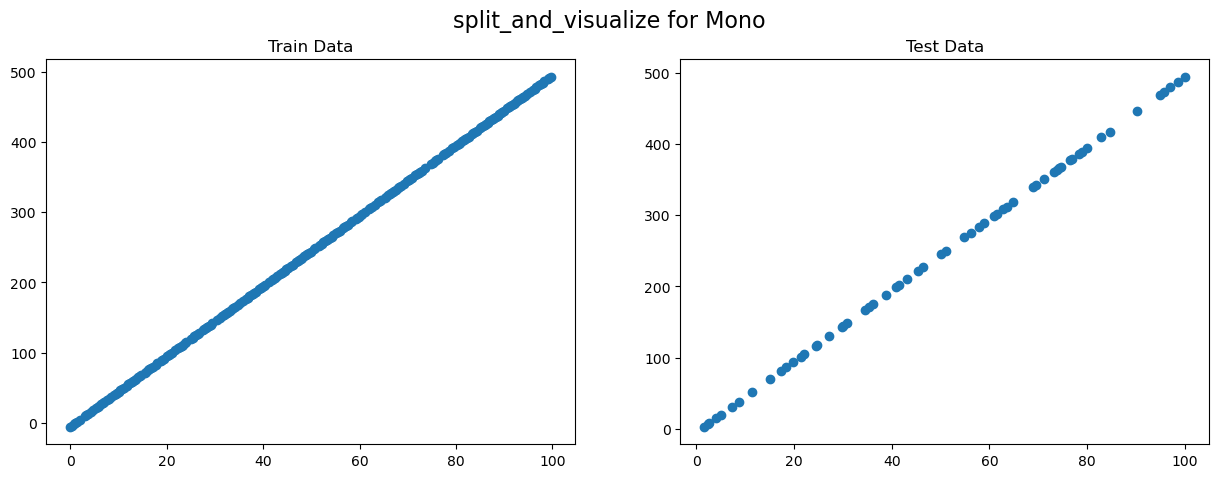

In [414]:
def split_and_visualize(dataset, filename, title, test_size=0.2, random_state=0):
    """
    Splits the dataset into train and test sets, visualizes the data, and saves the plot.
    
    Parameters:
        dataset (pd.DataFrame): Dataset with 'x' and 'y' columns.
        filename (str): File path to save the visualization.
        test_size (float): Proportion of the dataset to include in the test split (default is 0.2).
        random_state (int): Random state for reproducibility (default is 0).
    
    Returns:
        tuple: Train and test splits as (X_train, X_test, Y_train, Y_test).
    """
    # Splitting the dataset
    X, Y = dataset['x'], dataset['y']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    
    # Visualizing the train and test data
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    ax[0].scatter(X_train, Y_train)
    ax[0].set_title("Train Data")
    ax[1].scatter(X_test, Y_test)
    ax[1].set_title("Test Data")
    plt.savefig(filename)
    plt.show()
    
    return X_train, X_test, Y_train, Y_test

## split_and_visualize for hetero
hetero_filename = "D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 3/screenshots/2- Hetero_Dataset_train_test.png"
X_train_h, X_test_h, Y_train_h, Y_test_h = split_and_visualize(cleaned_hetero, hetero_filename, "split_and_visualize for hetero")

## split_and_visualize for Mono
monotonic_filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 3/screenshots/4- Monotonic_Dataset_train_test.png"
X_train_m, X_test_m, Y_train_m, Y_test_m = split_and_visualize(cleaned_monotonic, monotonic_filename, "split_and_visualize for Mono")


## 4. a) Model Performance (using R2)

In [415]:
def model_performance_R2(Y_true, y_pred):
    """
    Evaluate the performance of a regression model using various metrics.
    
    Parameters:
        Y_true (array-like): The true values (target variable).
        y_pred (array-like): The predicted values from the model.
        
    Returns:
        r_squared (float) : value of model performance.

    """
    
    # Convert Y_true and y_pred to NumPy arrays if they're Pandas Series
    Y_true = np.array(Y_true).flatten()  # Flatten to ensure it's 1D
    y_pred = np.array(y_pred).flatten()  # Flatten to ensure it's 1D

    ymean = np.mean(Y_true)
    RSS = 0
    TSS = 0
    eps = 0.00000001
    
    for true_value, pred_value in zip(Y_true, y_pred):
        RSS += (true_value - pred_value)**2
        TSS += (true_value - ymean)**2
    
    r_squared = 1 - (RSS / (TSS + eps))
    return r_squared

## 4. b) Polynomial Regression (Basic Implementation - From scratch)

In [416]:
def PolynomialRegression(X_train, Y_train, X_test, degree):
    """
    Perform Polynomial Regression from scratch and predict on both training and test data.
    
    Parameters:
        X_train (array-like): The input features (independent variable) for training.
        Y_train (array-like): The target variable (dependent variable) for training.
        X_test (array-like): The input features (independent variable) for testing.
        degree (int): Degree of the polynomial.
        
    Returns:
        BETAs (array): The coefficients of the polynomial regression model.
        ypred_train (array): Predicted values on the training data.
        ypred_test (array): Predicted values on the test data.
    """
    # Transform the input features to include polynomial terms for training data
    X_train_poly = np.array([X_train**i for i in range(1, degree+1)]).T  # Polynomial terms: x, x^2, ..., x^degree
    X_train_poly = np.c_[X_train_poly, np.ones(X_train_poly.shape[0])]  # Add a column of ones for the intercept term
    
    # Perform Matrix Operations for Polynomial Regression (Normal Equation)
    Xt = X_train_poly.T
    XtX = np.matmul(Xt, X_train_poly)
    XtXinv = np.linalg.inv(XtX)
    XtXinv_Xt = np.matmul(XtXinv, Xt)
    BETAs = np.matmul(XtXinv_Xt, Y_train)
    
    # Predictions on training data
    ypred_train = np.matmul(X_train_poly, BETAs)

    # Transform the input features to include polynomial terms for test data
    X_test_poly = np.array([X_test**i for i in range(1, degree+1)]).T  # Polynomial terms: x, x^2, ..., x^degree
    X_test_poly = np.c_[X_test_poly, np.ones(X_test_poly.shape[0])]  # Add a column of ones for the intercept term
    
    # Predictions on test data
    ypred_test = np.matmul(X_test_poly, BETAs)
    
    return BETAs, ypred_train, ypred_test

## 4. c) Checking all models performances

In [417]:
                        ###1. hetero dataset (X_train_h, X_test_h, Y_train_h, Y_test_h) ###

performance_metrics_hetero = {"Degree_3": {}, "Degree_4": {}}

# --> a. using degree = 3 (without any regularization)

    # Fitting the model on the training data and making predictions on both training and test data
BETAs_train_h_3, ypred_train_h_3, ypred_test_h_3 = PolynomialRegression(X_train_h, Y_train_h, X_test_h, degree=3)

    # Evaluate the model performance on train data
performance_metrics_hetero["Degree_3"]["R2_Train"] = model_performance_R2(Y_train_h, ypred_train_h_3)
    # Evaluate the model performance on test data
performance_metrics_hetero["Degree_3"]["R2_Test"] = model_performance_R2(Y_test_h, ypred_test_h_3)


# --> b. using degree = 4 (without any regularization)
BETAs_train_h_4, ypred_train_h_4, ypred_test_h_4 = PolynomialRegression(X_train_h, Y_train_h, X_test_h, degree=4)
    # Evaluate the model performance on train data
performance_metrics_hetero["Degree_4"]["R2_Train"] = model_performance_R2(Y_train_h, ypred_train_h_4)
    # Evaluate the model performance on test data
performance_metrics_hetero["Degree_4"]["R2_Test"] = model_performance_R2(Y_test_h, ypred_test_h_4)
print(f"Heteroscedastic Dataset R_Squared Values for Both Train & Test and Degree (3,4) :-\n--------------------------\n {pd.DataFrame(performance_metrics_hetero)}\n\n")

                        ###2. mono dataset (X_train_m, X_test_m, Y_train_m, Y_test_m)###
    
performance_metrics_mono = {"Degree_3": {}, "Degree_4": {}}

# --> a. using degree = 3 (without any regularization)
    # Fitting the model on the training data and making predictions on both training and test data
BETAs_train_m_3, ypred_train_m_3, ypred_test_m_3 = PolynomialRegression(X_train_m, Y_train_m, X_test_m, degree=3)
    # Evaluate the model performance on train data
performance_metrics_mono["Degree_3"]["R2_Train"] = model_performance_R2(Y_train_m, ypred_train_m_3)
    # Evaluate the model performance on test data
performance_metrics_mono["Degree_3"]["R2_Test"] = model_performance_R2(Y_test_m, ypred_test_m_3)

# --> b. using degree = 4 (without any regularization)
BETAs_train_m_4, ypred_train_m_4, ypred_test_m_4 = PolynomialRegression(X_train_m, Y_train_m, X_test_m, degree=4)
    # Evaluate the model performance on train data
performance_metrics_mono["Degree_4"]["R2_Train"] = model_performance_R2(Y_train_m, ypred_train_m_4)
    # Evaluate the model performance on test data
performance_metrics_mono["Degree_4"]["R2_Test"] = model_performance_R2(Y_test_m, ypred_test_m_4)


print(f"Monotonic Dataset R_Squared Values for Both Train & Test and Degree (3,4) :-\n--------------------------\n {pd.DataFrame(performance_metrics_mono)}\n\n")

Heteroscedastic Dataset R_Squared Values for Both Train & Test and Degree (3,4) :-
--------------------------
           Degree_3  Degree_4
R2_Train  0.855160  0.856479
R2_Test   0.845779  0.843266


Monotonic Dataset R_Squared Values for Both Train & Test and Degree (3,4) :-
--------------------------
           Degree_3  Degree_4
R2_Train       1.0       1.0
R2_Test        1.0       1.0




## 5. Identifying Overfitting


                                  'Hetero_dataset Overfitting Analysis'                                 

Heteroscedastic Dataset R_Squared Values for Both Train & Test and Degree (3,4) :-
--------------------------
           Degree_3  Degree_4
R2_Train  0.855160  0.856479
R2_Test   0.845779  0.843266




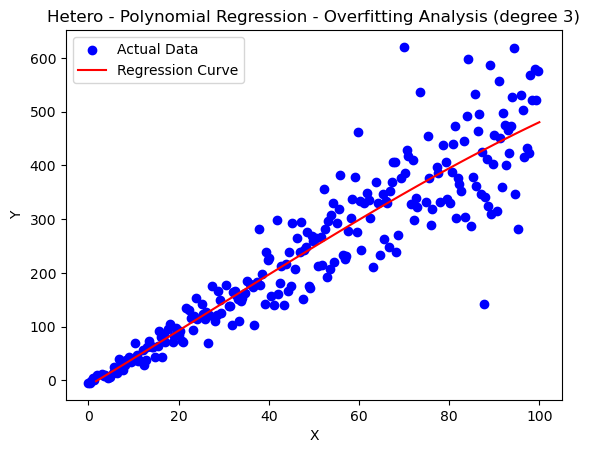

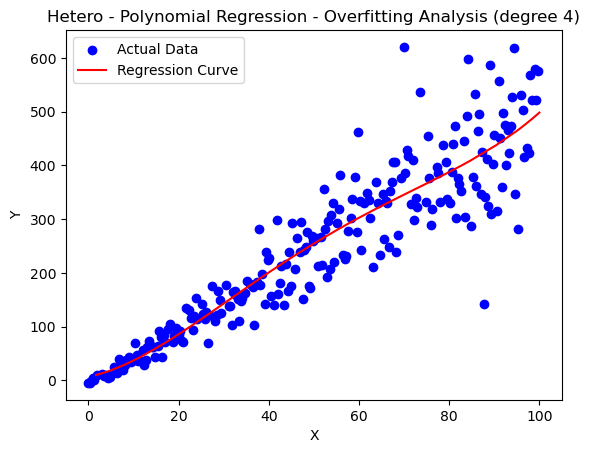




                                  'Mono_dataset Overfitting Analysis'                                 

Monotonic Dataset R_Squared Values for Both Train & Test and Degree (3,4) :-
--------------------------
           Degree_3  Degree_4
R2_Train       1.0       1.0
R2_Test        1.0       1.0




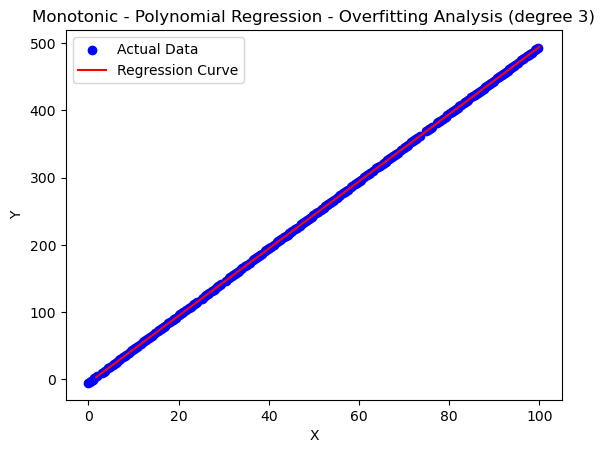

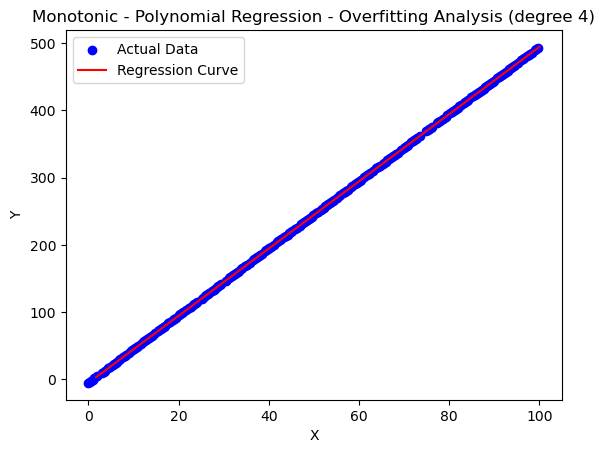

In [356]:
def Overfit_identifier(X_train, Y_train, X_test, Y_pred_test, title):
    """
    Visualizes the regression curve and actual data points for both training and test datasets.
    
    Parameters:
    - X_train, Y_train: Training data features and target.
    - X_test: Test data features.
    - Y_test_pred: Predictions on test data.
    - title: Title for the plot.
    """
    plt.scatter(X_train, Y_train, label='Actual Data', color='blue')
    plt.plot(np.sort(X_test), np.sort(Y_pred_test), label='Regression Curve', color='red')
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 3/screenshots/Reg_Overfitting{title}.png"
    plt.savefig(filename)
    plt.show()

### 1. hetero dataset overfitting analysis (X_train_h, X_test_h, Y_train_h, Y_test_h) 
print(f"\n                                  'Hetero_dataset Overfitting Analysis'                                 \n")
print(f"Heteroscedastic Dataset R_Squared Values for Both Train & Test and Degree (3,4) :-\n--------------------------\n {pd.DataFrame(performance_metrics_hetero)}\n\n")

    ## a. Degree = 3 (BETAs_train_h_3, ypred_train_h_3, ypred_test_h_3)
Overfit_identifier(X_train_h, Y_train_h, X_test_h, ypred_test_h_3, 'Hetero - Polynomial Regression - Overfitting Analysis (degree 3)')


    ## b. Degree = 4 (BETAs_train_h_4, ypred_train_h_4, ypred_test_h_4)
Overfit_identifier(X_train_h, Y_train_h, X_test_h, ypred_test_h_4, 'Hetero - Polynomial Regression - Overfitting Analysis (degree 4)')


### 2. monotonic dataset overfitting analysis (X_train_m, X_test_m, Y_train_m, Y_test_m) 
print(f"\n\n\n                                  'Mono_dataset Overfitting Analysis'                                 \n")
print(f"Monotonic Dataset R_Squared Values for Both Train & Test and Degree (3,4) :-\n--------------------------\n {pd.DataFrame(performance_metrics_mono)}\n\n")

    ## a. Degree = 3 (BETAs_train_m_3, ypred_train_m_3, ypred_test_m_3)
Overfit_identifier(X_train_m, Y_train_m, X_test_m, ypred_test_m_3, 'Monotonic - Polynomial Regression - Overfitting Analysis (degree 3)')


    ## b. Degree = 4 (BETAs_train_m_4, ypred_train_m_4, ypred_test_m_4)
Overfit_identifier(X_train_m, Y_train_m, X_test_m, ypred_test_m_4, 'Monotonic - Polynomial Regression - Overfitting Analysis (degree 4)')


## 6. Advanced Regularization Techniques

In [357]:
def regularization_techniuqes(X_train, y_train, X_test, y_test, alpha=1.0):
    """
    Applying Ridge, Lasso, and ElasticNet regression to the data and evaluate performance.

    Parameters:
    ----------
    X_train, y_train : array-like
        Training features and target values.
    X_test, y_test : array-like
        Testing features and target values.
    alpha : float, default=1.0
        Regularization strength.
    
    Returns:
    -------
    R² scores : dict
        Contains R² scores for Ridge, Lasso, and ElasticNet models.
    """
    # Ensure X_train and X_test are 2D arrays
    X_train = np.array(X_train).reshape(-1, 1) if X_train.ndim == 1 else np.array(X_train)
    X_test = np.array(X_test).reshape(-1, 1) if X_test.ndim == 1 else np.array(X_test)
    
    # Ensure y_train and y_test are 1D arrays
    y_train = np.array(y_train).ravel()
    y_test = np.array(y_test).ravel()
    
    # Ridge Regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    
    # Lasso Regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    
    # ElasticNet Regression
    elasticnet = ElasticNet(alpha=alpha)
    elasticnet.fit(X_train, y_train)
    elasticnet_pred = elasticnet.predict(X_test)
    
    return {
        "Ridge": model_performance_R2(y_test, ridge_pred),
        "Lasso": model_performance_R2(y_test, lasso_pred),
        "ElasticNet": model_performance_R2(y_test, elasticnet_pred)
    }

# 1. Regularized models for Hetero Dataset (X_train_h, X_test_h, Y_train_h, Y_test_h)

regularized_metrics1 = regularization_techniuqes(X_train_h, Y_train_h, X_test_h, Y_test_h, alpha=1.0)
print("\nRegularized Model Metrics (Hetero Dataset):-\n\n", regularized_metrics1)
    
    
# 2. Regularized models for Mono Dataset (X_train_m, X_test_m, Y_train_m, Y_test_m)

regularized_metrics2 = regularization_techniuqes(X_train_m, Y_train_m, X_test_m, Y_test_m, alpha=1.0)
print(f"\nRegularized Model Metrics (Mono Dataset):-\n\n", regularized_metrics2)


Regularized Model Metrics (Hetero Dataset):-

 {'Ridge': 0.8495172582575136, 'Lasso': 0.8494913870481352, 'ElasticNet': 0.849438545673904}

Regularized Model Metrics (Mono Dataset):-

 {'Ridge': 0.9999999999755519, 'Lasso': 0.9999999436708727, 'ElasticNet': 0.9999994936387789}


## 7. Model Optimization and Hyperparameter Tuning

In [376]:
def Optimizer(X_train, y_train, estimator, param_grid):
    """
    Perform grid search to find the best model based on R² scoring.

    Parameters:
    ----------
    X_train, y_train : array-like Training data and target values.
    estimator : model instance The regression model to be tuned.
    param_grid : dictThe grid of hyperparameters to search over.

    Returns:
    -------
    best_estimator : model instance The model with the best parameters.
    best_params : dict The best hyperparameters from the grid search.
    best_score: float the mean cross-validated R² score for the best model found.
    """
    # Ensure X_train is 2D arrays to deal with the gridsearch algorithm
    X_train = np.array(X_train).reshape(-1, 1) if X_train.ndim == 1 else np.array(X_train)    
    # Ensure y_train is 1D arrays
    y_train = np.array(y_train).ravel()
    grid_search = GridSearchCV(estimator, param_grid, cv=10, scoring='r2')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# Parameter grids
param_grid_ridge = {'alpha': np.arange(0.001, 300)}
param_grid_elasticnet = {'alpha': np.arange(0.001, 300),'l1_ratio': np.linspace(0.01, 1.0, 20)}
#### Evaluate the performance of the optimized models
# 1. Hyperparameter tuning over Hetero Dataset (X_train_h, X_test_h, Y_train_h, Y_test_h)

hetero_model_optimized_alpha = {}
RSquared_Optimized_Hetero = {}
best_ridge_modelH, best_ridge_alpha_modelH = Optimizer(X_train_h, Y_train_h, Ridge(), param_grid_ridge) ## a) Ridge 
best_Lasso_modelH, best_Lasso_alpha_modelH = Optimizer(X_train_h, Y_train_h, Lasso(), param_grid_ridge) ## b) Lasso
best_elasticnet_modelH, best_elasticnet_alpha_modelH = Optimizer(X_train_h, Y_train_h, ElasticNet(), param_grid_elasticnet) ## c) Elasticnet
hetero_model_optimized_alpha["Ridge_alpha"], hetero_model_optimized_alpha["Lasso_alpha"] ,hetero_model_optimized_alpha["Elasticnet_alpha"] = best_ridge_alpha_modelH["alpha"], best_Lasso_alpha_modelH["alpha"], best_elasticnet_alpha_modelH["alpha"]
print(f"\nBest parameters for regularized models (Hetero Dataset):-\n{hetero_model_optimized_alpha}\n")

reg_H = regularization_techniuqes(X_train_h, Y_train_h, X_test_h, Y_test_h, alpha=hetero_model_optimized_alpha["Ridge_alpha"])
las_H = regularization_techniuqes(X_train_h, Y_train_h, X_test_h, Y_test_h, alpha=hetero_model_optimized_alpha["Lasso_alpha"])
ela_H = regularization_techniuqes(X_train_h, Y_train_h, X_test_h, Y_test_h, alpha=hetero_model_optimized_alpha["Elasticnet_alpha"])
RSquared_Optimized_Hetero["Ridge"], RSquared_Optimized_Hetero["Lasso"], RSquared_Optimized_Hetero["ElasticNet"] = reg_H["Ridge"], las_H["Lasso"], ela_H["ElasticNet"]
print(f"\nR-Squared values for regularized models after Optimization with GridSearchCV (Hetero Dataset - Test Data):-\n{RSquared_Optimized_Hetero}\n")

# 2. Hyperparameter tuning for Ridge over Mono Dataset (X_train_m, X_test_m, Y_train_m, Y_test_m)
mono_model_optimized_alpha = {}
RSquared_Optimized_Mono = {}
best_ridge_modelM, best_ridge_alpha_modelM = Optimizer(X_train_m, Y_train_m, Ridge(), param_grid_ridge) ## a) Ridge 
best_Lasso_modelM, best_Lasso_alpha_modelM = Optimizer(X_train_m, Y_train_m, Lasso(), param_grid_ridge) ## b) Lasso
best_elasticnet_modelM, best_elasticnet_alpha_modelM = Optimizer(X_train_m, Y_train_m, ElasticNet(), param_grid_elasticnet) ## c) Elasticnet
mono_model_optimized_alpha["Ridge_alpha"], mono_model_optimized_alpha["Lasso_alpha"] ,mono_model_optimized_alpha["Elasticnet_alpha"] = best_ridge_alpha_modelM["alpha"], best_Lasso_alpha_modelM["alpha"], best_elasticnet_alpha_modelM["alpha"]
print(f"\nBest parameters for regularized models (Mono Dataset):-\n{mono_model_optimized_alpha}\n")

reg_M = regularization_techniuqes(X_train_m, Y_train_m, X_test_m, Y_test_m, alpha=mono_model_optimized_alpha["Ridge_alpha"])
las_M = regularization_techniuqes(X_train_m, Y_train_m, X_test_m, Y_test_m, alpha=mono_model_optimized_alpha["Lasso_alpha"])
ela_M = regularization_techniuqes(X_train_m, Y_train_m, X_test_m, Y_test_m, alpha=mono_model_optimized_alpha["Elasticnet_alpha"])
RSquared_Optimized_Mono["Ridge"], RSquared_Optimized_Mono["Lasso"], RSquared_Optimized_Mono["ElasticNet"] = reg_M["Ridge"], las_M["Lasso"], ela_M["ElasticNet"]
print(f"\nR-Squared values for regularized models after Optimization with GridSearchCV (Mono Dataset - Test Data):-\n{RSquared_Optimized_Mono}\n")



Best parameters for regularized models (Hetero Dataset):-
{'Ridge_alpha': 299.0009999999999, 'Lasso_alpha': 31.000999999999998, 'Elasticnet_alpha': 7.0009999999999994}


R-Squared values for regularized models after Optimization with GridSearchCV (Hetero Dataset):-
{'Ridge': 0.8493526242874332, 'Lasso': 0.8486598233086159, 'ElasticNet': 0.8489492486646124}


Best parameters for regularized models (Mono Dataset):-
{'Ridge_alpha': 0.001, 'Lasso_alpha': 0.001, 'Elasticnet_alpha': 0.001}


R-Squared values for regularized models after Optimization with GridSearchCV (Mono Dataset):-
{'Ridge': 1.0, 'Lasso': 0.9999999999999437, 'ElasticNet': 0.9999999999994931}



In [381]:
## This an additional section if I need to get the R_squared over the train cross validated data not test

# 1. Hyperparameter tuning over Hetero Dataset (X_train_h, X_test_h, Y_train_h, Y_test_h)
hetero_model_optimized_RSquared = {}
best_ridge_modelH, best_ridge_alpha_modelH, best_score_ridge = Optimizer(X_train_h, Y_train_h, Ridge(), param_grid_ridge) ## a) Ridge 
best_Lasso_modelH, best_Lasso_alpha_modelH, best_score_Lasso = Optimizer(X_train_h, Y_train_h, Lasso(), param_grid_ridge) ## b) Lasso
best_elasticnet_modelH, best_elasticnet_alpha_modelH, best_score_elasticnet = Optimizer(X_train_h, Y_train_h, ElasticNet(), param_grid_elasticnet) ## c) Elasticnet
hetero_model_optimized_RSquared["Ridge_R_Squared"], hetero_model_optimized_RSquared["Lasso_R_Squared"] ,hetero_model_optimized_RSquared["Elasticnet_R_Squared"] = best_score_ridge, best_score_Lasso, best_score_elasticnet
hetero_model_optimized_alpha["Ridge_alpha"], hetero_model_optimized_alpha["Lasso_alpha"] ,hetero_model_optimized_alpha["Elasticnet_alpha"] = best_ridge_alpha_modelH["alpha"], best_Lasso_alpha_modelH["alpha"], best_elasticnet_alpha_modelH["alpha"]
print(f"\nBest R-Squared for regularized models (Hetero Dataset):-\n{hetero_model_optimized_RSquared}\n")
# 2. Hyperparameter tuning for Ridge over Mono Dataset (X_train_m, X_test_m, Y_train_m, Y_test_m)
mono_model_optimized_RSquared = {}
best_ridge_modelM, best_ridge_alpha_modelM, best_score_ridge = Optimizer(X_train_m, Y_train_m, Ridge(), param_grid_ridge) ## a) Ridge 
best_Lasso_modelM, best_Lasso_alpha_modelM, best_score_Lasso = Optimizer(X_train_m, Y_train_m, Lasso(), param_grid_ridge) ## b) Lasso
best_elasticnet_modelM, best_elasticnet_alpha_modelM , best_score_elasticnet = Optimizer(X_train_m, Y_train_m, ElasticNet(), param_grid_elasticnet) ## c) Elasticnet
mono_model_optimized_RSquared["Ridge_R_Squared"], mono_model_optimized_RSquared["Lasso_R_Squared"] ,mono_model_optimized_RSquared["Elasticnet_R_Squared"] = best_score_ridge, best_score_Lasso, best_score_elasticnet
mono_model_optimized_alpha["Ridge_alpha"], mono_model_optimized_alpha["Lasso_alpha"] ,mono_model_optimized_alpha["Elasticnet_alpha"] = best_ridge_alpha_modelM["alpha"], best_Lasso_alpha_modelM["alpha"], best_elasticnet_alpha_modelM["alpha"]
print(f"\nBest R-Squared for regularized models (Mono Dataset):-\n{mono_model_optimized_RSquared}\n")


Best R-Squared for regularized models (Hetero Dataset):-
{'Ridge_R_Squared': 0.8541029373890947, 'Lasso_R_Squared': 0.8541028084697084, 'Elasticnet_R_Squared': 0.8541045610043844}


Best R-Squared for regularized models (Mono Dataset):-
{'Ridge_R_Squared': 1.0, 'Lasso_R_Squared': 0.9999999999999412, 'Elasticnet_R_Squared': 0.9999999999999412}



## 8. Handling Heteroscedasticity

Data statistics after removing missing values and outliers:-
                x           y
count  281.000000  281.000000
mean    53.174877    5.383604
std     27.182045    0.719204
min      5.685619    3.244895
25%     29.765886    4.985115
50%     53.177258    5.562415
75%     76.588629    5.929448
max    100.000000    6.526190



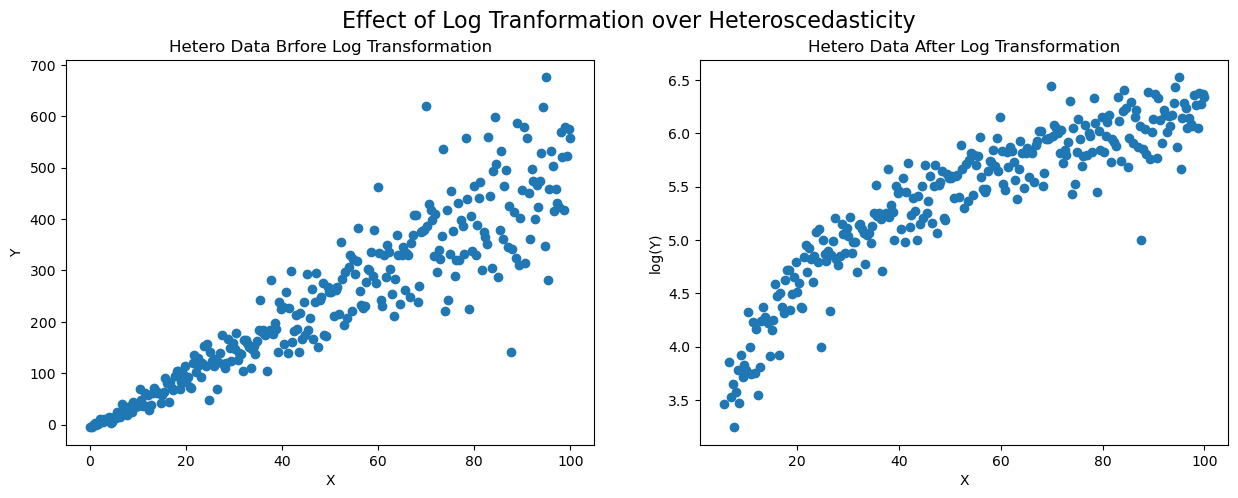

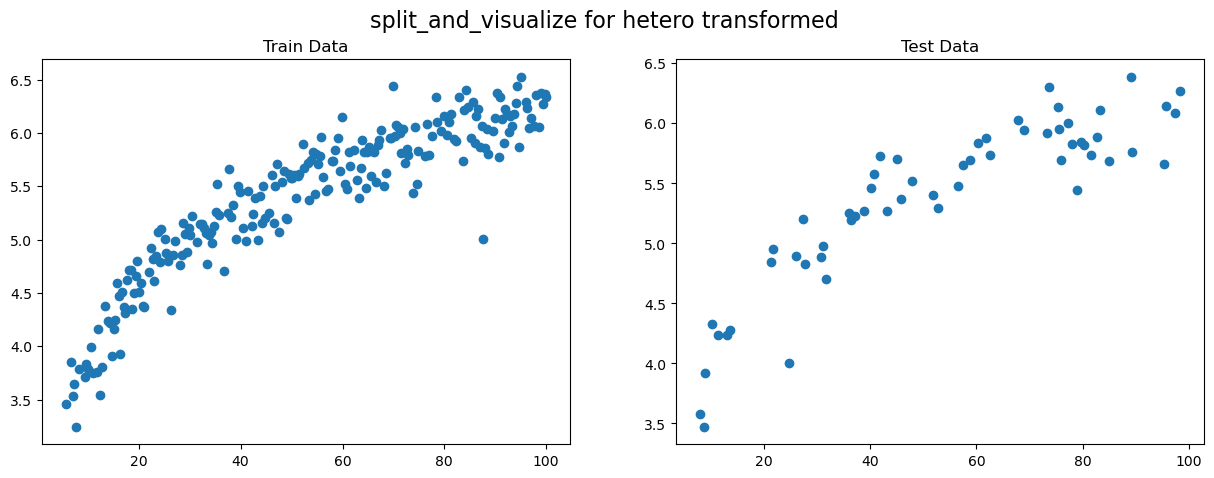

In [423]:
# Transforming the Target Variable using Logarithmic (X_train_h, X_test_h, Y_train_h_log, Y_test_h_log)
    ## Handle Negative Values first
if (cleaned_hetero['y'] < 0).any():
    cleaned_hetero['y'] = cleaned_hetero['y'] - cleaned_hetero['y'].min() + 1
    
    ## transform the target
transformed = cleaned_hetero.copy()
transformed['y'] = np.log(transformed['y'] + 1) # Ensure no zero values for log transformation
transformed_P = preprocess_data(transformed)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Effect of Log Tranformation over Heteroscedasticity", fontsize=16)
ax[0].scatter(hetero['x'],hetero['y'])
ax[0].set_title("Hetero Data Brfore Log Transformation")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")
ax[1].scatter(transformed_P['x'],transformed_P['y'])
ax[1].set_title("Hetero Data After Log Transformation")
ax[1].set_xlabel("X")
ax[1].set_ylabel("log(Y)")
filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 3/screenshots/Hetero_Dataset_transformed.png"
plt.savefig(filename)
plt.show()

    ## split_and_visualize for hetero after log transform
hetero_filename = "D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 3/screenshots/Hetero_Dataset_train_test_transformed.png"
X_train_h_t, X_test_h_t, Y_train_h_t, Y_test_h_t = split_and_visualize(transformed_P, hetero_filename, "split_and_visualize for hetero transformed")

## 9. Error Analysis




### ---> before tranformation



The residuals statistics:
  Statistic  Residual Values
0     count        60.000000
1      mean         8.044923
2       std        65.353553
3       min      -164.905958
4       25%       -18.896864
5       50%         4.933172
6       75%        32.765442
7       max       215.763636



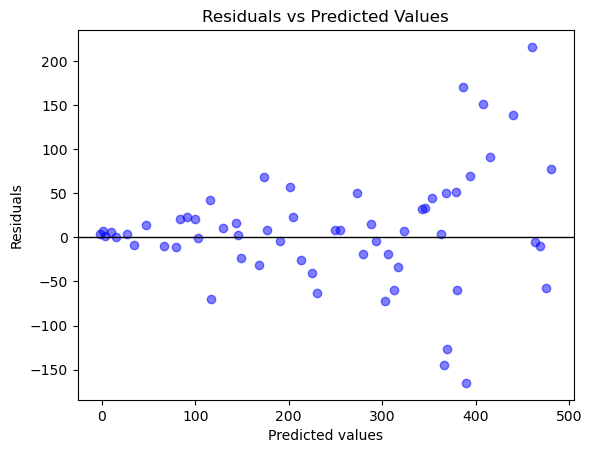

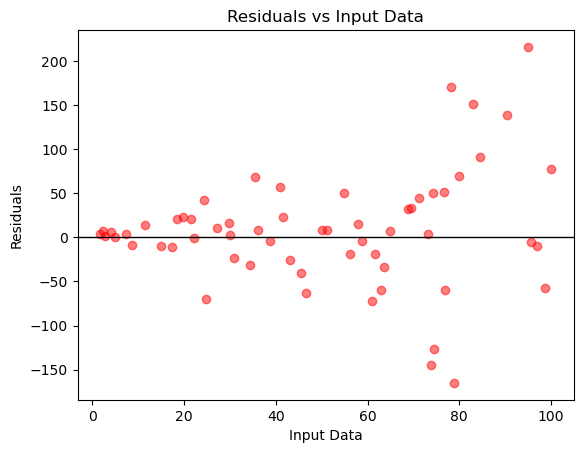




### ---> after transformation





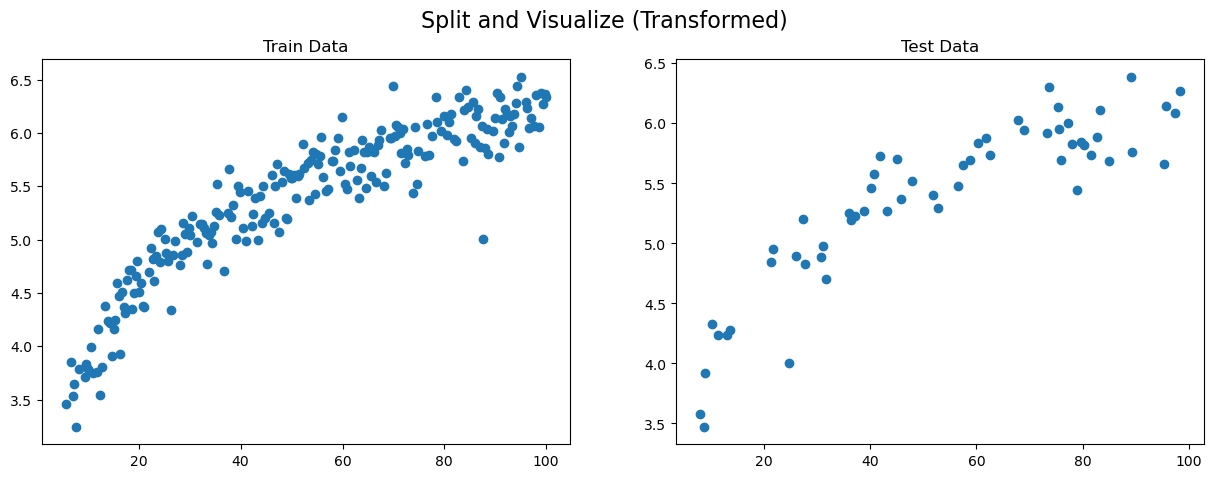

The residuals statistics:
  Statistic  Residual Values
0     count        57.000000
1      mean        -0.009819
2       std         0.241759
3       min        -0.750929
4       25%        -0.137860
5       50%        -0.009748
6       75%         0.137689
7       max         0.430807



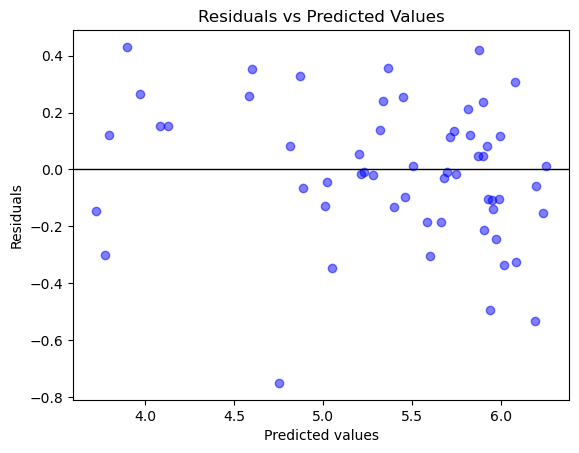

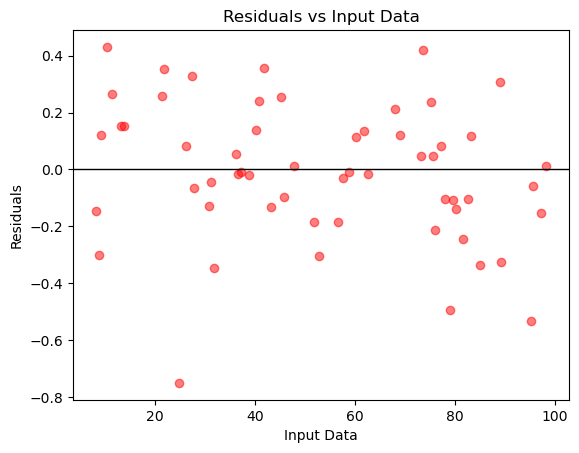

In [440]:
def residual_analysis(X_test, y_true, y_pred):
    """
    Perform residual analysis by plotting residuals against predicted values and input data.
    
    Parameters:
        X_test (array-like): Test input data.
        y_true (array-like): The true target values.
        y_pred (array-like): The predicted target values.
    
    Returns:
        None
    """
    # Calculate residuals
    residuals = y_true - y_pred

    # Print residual statistics
    residuals_stats = pd.DataFrame(residuals.describe())
    residuals_stats_reset = residuals_stats.reset_index()
    residuals_stats_reset.columns = ['Statistic', 'Residual Values']
    print(f"The residuals statistics:\n{residuals_stats_reset}\n")

    # Plot residuals vs predicted values
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(0, color='black', linewidth=1)
    plt.title("Residuals vs Predicted Values")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.show()

    # Plot residuals vs input data
    plt.scatter(X_test, residuals, color='red', alpha=0.5)
    plt.axhline(0, color='black', linewidth=1)
    plt.title("Residuals vs Input Data")
    plt.xlabel("Input Data")
    plt.ylabel("Residuals")
    plt.show()
    
### ---> before tranformation
print(f"\n\n\n### ---> before tranformation\n\n\n")
# usage with your heteroscedastic dataset (polynomial reg - degree 3)
residual_analysis(X_test_h,Y_test_h, ypred_test_h_3)

### ---> after transformation
print(f"\n\n\n### ---> after transformation\n\n\n")
# Split and visualize data 
transform_filename = "D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 3/screenshots/transformed_split.png"
x_tran_train, x_tran_test, y_tran_train, y_tran_test = split_and_visualize(transformed_P, transform_filename, "Split and Visualize (Transformed)")
#Perform Polynomial Regression (Degree = 3)
BETAs_train_h_, ypred_train_h_, ypred_test_h_ = PolynomialRegression(x_tran_train, y_tran_train, x_tran_test, degree=3)
# Residual Analysis over transformed data
residual_analysis(x_tran_test, y_tran_test, ypred_test_h_)